**Credit Card Fraud Model: An Introduction**

Credit Card dataset contains transaction information made in September 2013 by European cardholders. The dataset includes transactions occured in two days, where 492 frauds are made out of 284,807. It contains numerical input values made by result of a PCA transformation. The original data cannot be provided due to confidentiality issue so we cannot tell the dimension and the complexity involved with the data but, transformation has been made and the resulting principle compoenents are represented in the dataset as V1, V2, V3, .... V28. 'Time' and 'Amount' are the only columns in dataset that has not been applied a PCA. PCA is a technique that transforms high dimensions data into lower dimensions while retaining as much information as possible and allows for faster learning of machine learning algorithm (faster results.)

**Key Features**:

- V1 ~ V28: principle components obtained with PCA.
- Class: Fraud or non-fraud (1: Fraud)
- Time: Seconds elapsed between each transaction and the first transaction 
- Amount: Transaction Amount

**Objective**:

The objective of the projeect is to create a model that define fraudulent cases. With the imbalance of high numbers of normal transaction vs less numbers of fraudlent cases, the model will try to implement this scenario as well.

In [1]:
pip install matplotlib seaborn numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Loading Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np


In [3]:
#Load Credit Card Data
fraud_credit = pd.read_csv("creditcard.csv")

In [4]:
#Overview of the dataset
head_credit = fraud_credit.head()
info_credit = fraud_credit.info()

head_credit, info_credit

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

(   Time        V1        V2        V3        V4        V5        V6        V7  \
 0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
 1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
 2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
 3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
 4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
 
          V8        V9  ...       V21       V22       V23       V24       V25  \
 0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
 1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
 2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
 3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
 4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   
 
         V26      

In [5]:
fraud_credit.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Dataset is a list of Time, Amount, Class and PCA transformation columns.

In [6]:
fraud_credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
fraud_credit[['Time','Amount','Class']].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


By the looks of time, amount and class, Time ranges from 0 to 172,792 and represents the seconds elapsed between transactions. The mean time is apporximately 94,814 seconds, which amount to a little over a day.
The amount ranges from $0 to $25,691.16, where mean is approx. $88.35. With the wide range and SD, the feature might benefit from scaling. The class, majority of transactions are legitimate with barely classified as fraudulent.

In [8]:
fraud_counts_percentage = round(fraud_credit['Class'].value_counts() / len(fraud_credit['Class']) * 100, 2)

for index, value in fraud_counts_percentage.items():
    print(f"{index}: {value}%")


0: 99.83%
1: 0.17%


Class = 1, fraudulent and Class = 0 is legitimate transactions. The percentage shows 99.83% are legitimate transactions while only 0.17% account as fradulent cases.

In [9]:
fraud_credit.isnull().sum().sum()

0

There are no missing values in the dataset.

C:\Users\lifet\AppData\Local\Temp\ipykernel_28248\3616959048.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(fraud_credit['Time'], bins=50, ax=ax[0], palette='pastel')
C:\Users\lifet\AppData\Local\Temp\ipykernel_28248\3616959048.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fraud_credit['Amount'], bins=50, color= 'blue', ax=ax[1])


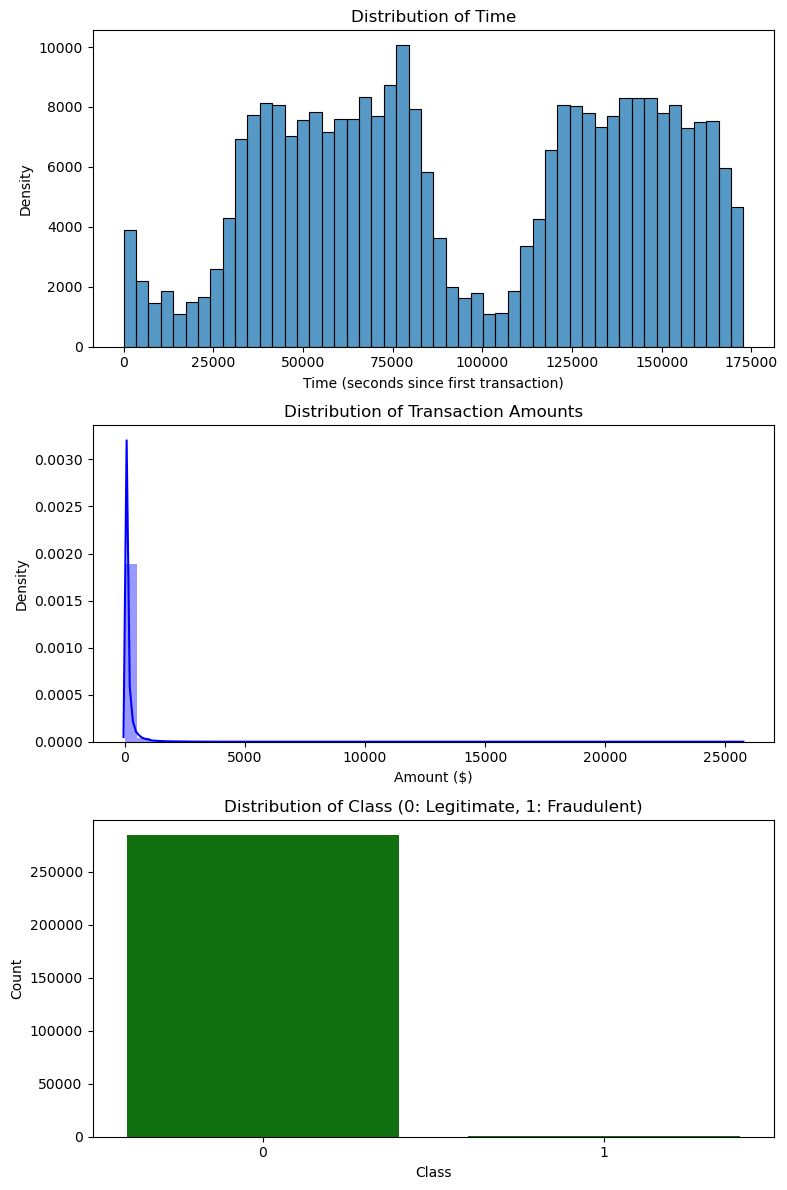

In [10]:
fig, ax= plt.subplots(nrows = 3, ncols=1, figsize=(8,12))

sns.histplot(fraud_credit['Time'], bins=50, ax=ax[0], palette='pastel')
ax[0].set_title('Distribution of Time')
ax[0].set_xlabel('Time (seconds since first transaction)')
ax[0].set_ylabel('Density')

sns.distplot(fraud_credit['Amount'], bins=50, color= 'blue', ax=ax[1])
ax[1].set_title('Distribution of Transaction Amounts')
ax[1].set_xlabel('Amount ($)')
ax[1].set_ylabel('Density')

sns.countplot(x = fraud_credit['Class'], color = 'Green')
ax[2].set_title('Distribution of Class (0: Legitimate, 1: Fraudulent)')
ax[2].set_xlabel('Class')
ax[2].set_ylabel('Count')

plt.tight_layout()
plt.show()


- Distribution of Time: 'Time' feature represents the seconds elapsed between each transaction and the first transaction in the dataset. The distribution shows two peaks, which might point to the two days of transaction data we have.
- Distribution of Transaction Amounts: Most transactions are small amount as a point we mentioned earlier. We also have a data that has a peak close to zero. However, there are also some larger transactions, which makes the distribution right skewed.
- Distribution of Class (Fraud vs. Non-Fraud): As discussed earlier, the dataset is highly imbalanced. 99.83% are legitimate transaction while only .17% are fraudulent transactions. 

Next few plots show relational plots between two variables. 

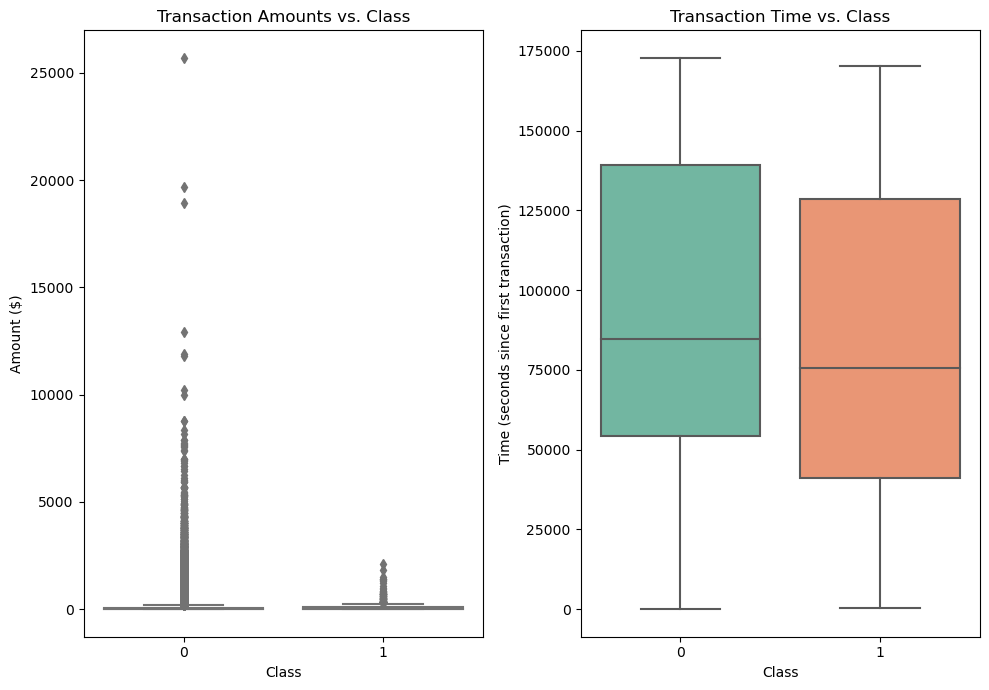

In [11]:
plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
sns.boxplot(x=fraud_credit['Class'], y=fraud_credit['Amount'], palette = 'pastel')
plt.title('Transaction Amounts vs. Class')
plt.xlabel('Class')
plt.ylabel('Amount ($)')

plt.subplot(1,2,2)
sns.boxplot(x='Class', y = 'Time', data = fraud_credit, palette= 'Set2')
plt.title('Transaction Time vs. Class')
plt.xlabel('Class')
plt.ylabel('Time (seconds since first transaction)')

plt.tight_layout()
plt.show()

- Transaction Amounts vs. Class: Fraudulent transactions tend to have a wider range of transaction amounts compared to legitimate oness, but, the median is lower.
- Transaction Time vs. Class: Distribution of transaction times for both fraudulent and legitimate ones are somewhat similar. But, there might be certain times when fraulent activity is slightly more prevalent.

C:\Users\lifet\AppData\Local\Temp\ipykernel_28248\788910239.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fraud_credit[fraud_credit['Class'] == 0]['Time'], bins = 50, color = 'green', label = 'Legitimate')
C:\Users\lifet\AppData\Local\Temp\ipykernel_28248\788910239.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637

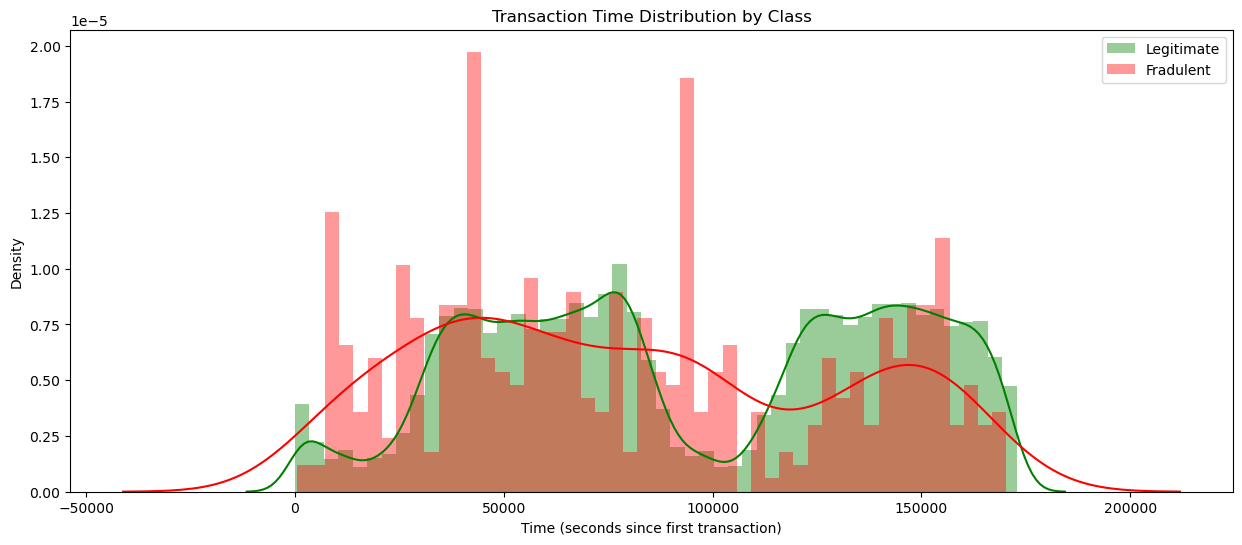

In [12]:
plt.figure(figsize=(15, 6))

sns.distplot(fraud_credit[fraud_credit['Class'] == 0]['Time'], bins = 50, color = 'green', label = 'Legitimate')
sns.distplot(fraud_credit[fraud_credit['Class'] == 1]['Time'], bins = 50, color = 'red', label = 'Fradulent')

plt.title('Transaction Time Distribution by Class')
plt.xlabel('Time (seconds since first transaction)')
plt.ylabel('Density')
plt.legend()

plt.show()



There are a few patterns we can see from the plot.

- The green distribution represents legitimate transaction with red distribution representing the fraudulent transactions. Both patterns of transactions seem to follow similar trend over time, but, with two clear peaks, as I susptect that it is a result of the two days of transaction data. 
- There is a noticeable dip in between which may represent nighttime when there are fewer trnasactions.
- Patterns seem relatively similar, but the density of fradulent transactions at certain times are subtly different.


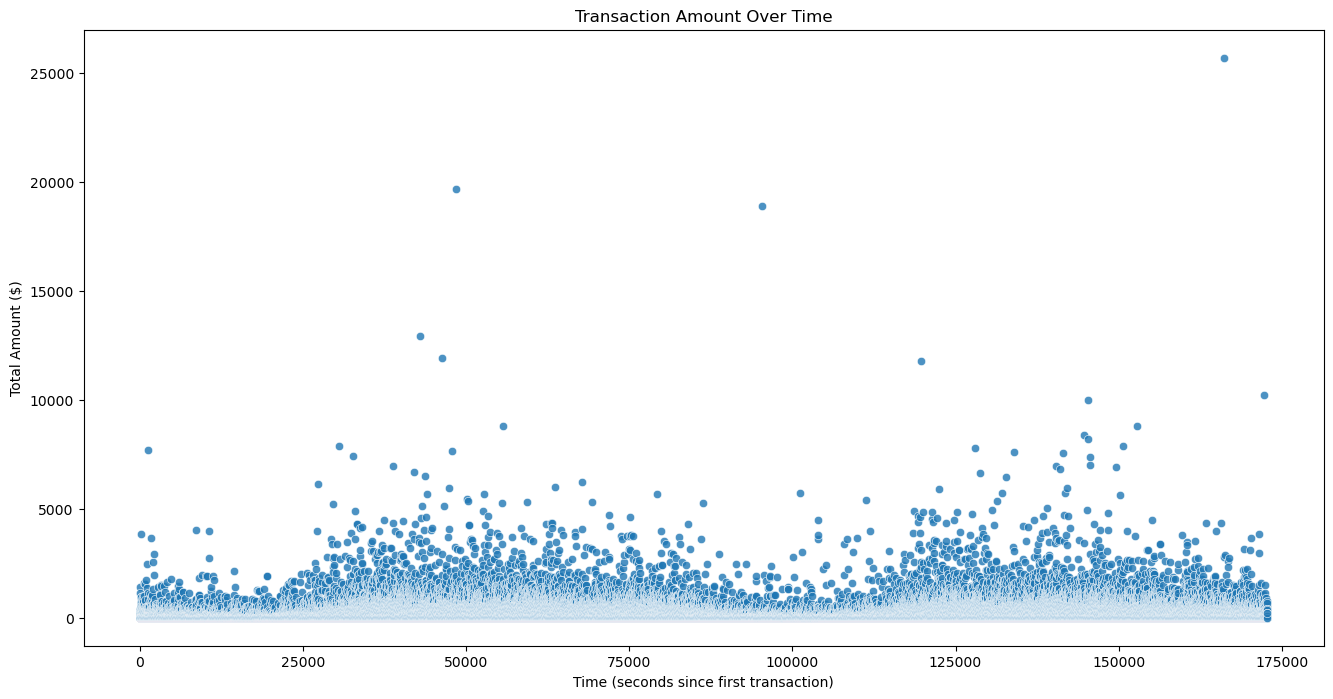

In [13]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data = fraud_credit, x='Time', y='Amount', alpha=0.8)
plt.title('Transaction Amount Over Time')
plt.xlabel('Time (seconds since first transaction)')
plt.ylabel('Total Amount ($)')
plt.show()

This scatters shows the transaction amount over time. most transactions as mentioned earlier are of lower amounts, but clearly, there are occasional larger transactions distributed throughout.



            Time    Amount     Class
Time    1.000000 -0.010596 -0.012323
V1      0.117396 -0.227709 -0.101347
V2     -0.010593 -0.531409  0.091289
V3     -0.419618 -0.210880 -0.192961
V4     -0.105260  0.098732  0.133447
V5      0.173072 -0.386356 -0.094974
V6     -0.063016  0.215981 -0.043643
V7      0.084714  0.397311 -0.187257
V8     -0.036949 -0.103079  0.019875
V9     -0.008660 -0.044246 -0.097733
V10     0.030617 -0.101502 -0.216883
V11    -0.247689  0.000104  0.154876
V12     0.124348 -0.009542 -0.260593
V13    -0.065902  0.005293 -0.004570
V14    -0.098757  0.033751 -0.302544
V15    -0.183453 -0.002986 -0.004223
V16     0.011903 -0.003910 -0.196539
V17    -0.073297  0.007309 -0.326481
V18     0.090438  0.035650 -0.111485
V19     0.028975 -0.056151  0.034783
V20    -0.050866  0.339403  0.020090
V21     0.044736  0.105999  0.040413
V22     0.144059 -0.064801  0.000805
V23     0.051142 -0.112633 -0.002685
V24    -0.016182  0.005146 -0.007221
V25    -0.233083 -0.047837  0.003308
V

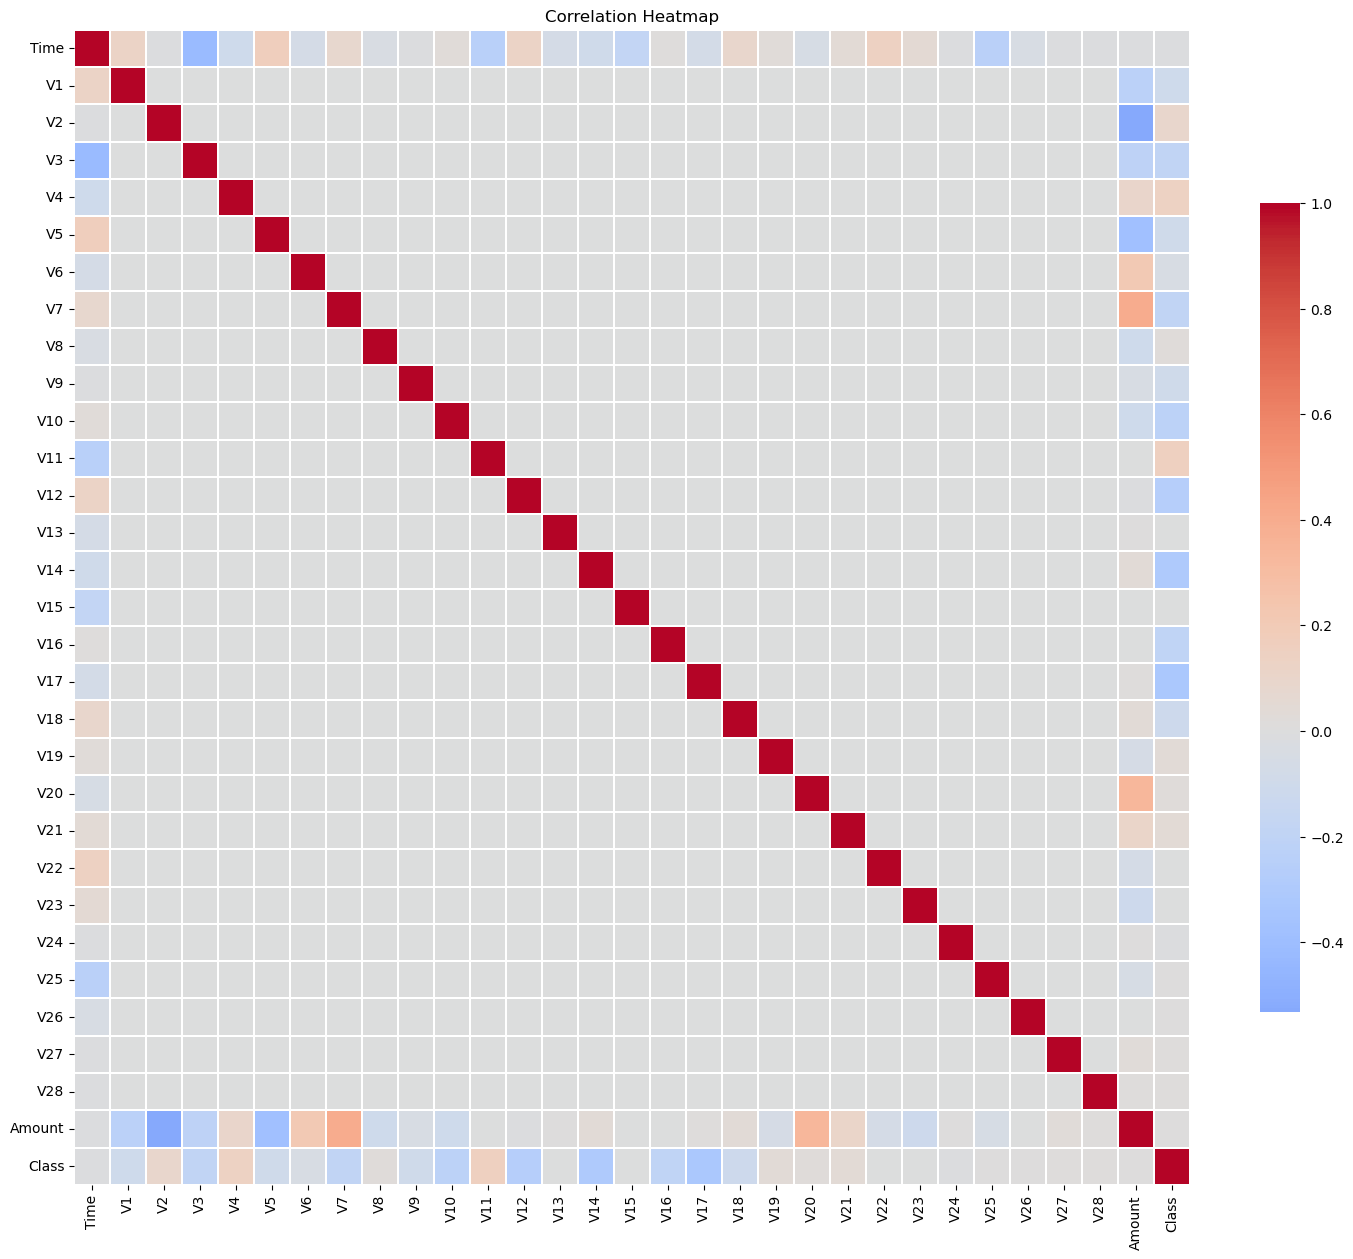

In [14]:
corr_matrix = fraud_credit.corr()
# Sort correlations with 'Class' column
sorted_correlations = corr_matrix['Class'].sort_values(ascending=False)

# Extract top 5 and bottom 5
top_5_strongest = sorted_correlations[1:6]  # Excluding the correlation with itself
top_5_weakest = sorted_correlations[-5:]

top_5_strongest, top_5_weakest

print(corr_matrix[['Time','Amount','Class']])
plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, linewidths=.1, cbar_kws={"shrink": 0.7})
plt.title('Correlation Heatmap')
plt.show()

In [15]:
# Sort correlations with 'Class' column
sorted_correlations = corr_matrix['Class'].sort_values(ascending=False)

# Extract top 5 and bottom 5
top_5_strongest = sorted_correlations[1:6]
top_5_weakest = sorted_correlations[-5:]

top_5_strongest, top_5_weakest

(V11    0.154876
 V4     0.133447
 V2     0.091289
 V21    0.040413
 V19    0.034783
 Name: Class, dtype: float64,
 V16   -0.196539
 V10   -0.216883
 V12   -0.260593
 V14   -0.302544
 V17   -0.326481
 Name: Class, dtype: float64)

The correlation feature shows: 
- The 'time' has a negative correlation of approximately -0.0123 with the 'Class'. This suggests the transaction time might have some small relation to the linklihood of a trnasaction being fradulent.
- 'Amount' has a positive correlation of approx. 0.0056, indiating a slight tendency for fradulent transactions to have different transaction amounts compared to legitimate ones but, still the correlation is small.
- With the V# columns, in relation with class, a lot are to be in a strong negative correlation suggesting that they might be particularly important in distinguishing between fradulent and legitimate transactions.

In [16]:
from scipy.stats import zscore

# Calculate Z-scores for the 'Amount' column
fraud_credit['Amount_Zscore'] = zscore(fraud_credit['Amount'])

# Filter transactions with Z-scores greater than 2 or less than -2
suspicious_transactions = fraud_credit[(fraud_credit['Amount_Zscore'] > 2) | (fraud_credit['Amount_Zscore'] < -2)]

# Display the number of suspicious transactions and some of them
num_suspicious_transactions = suspicious_transactions.shape[0]
num_suspicious_transactions, suspicious_transactions.head()


(7319,
       Time        V1         V2        V3        V4        V5        V6  \
 51    36.0 -1.004929  -0.985978 -0.038039  3.710061 -6.631951  5.122103   
 89    59.0 -0.773293  -4.146007 -0.932038  0.027094 -1.698307  0.460188   
 140   87.0 -5.101877   1.897022 -3.458034 -1.277543 -5.517758  2.098366   
 150   93.0 -1.640014  -0.479831  1.613630  2.997979 -3.803788  5.051812   
 164  103.0 -6.093248 -12.114213 -5.694973  3.294389 -1.413792  4.776000   
 
            V7        V8        V9  ...       V22       V23       V24  \
 51   4.371691 -2.006868 -0.278736  ... -0.381671  0.969719  0.019445   
 89   0.737344 -0.314216 -0.842673  ...  0.026123 -1.134769 -0.654958   
 140  3.329603  1.250966  0.271501  ... -0.678879 -0.555900 -0.761660   
 150  3.315254 -0.303785  0.671395  ...  0.641891 -0.405779 -1.268700   
 164  4.808426 -0.228197 -0.525896  ... -2.264037 -3.553381  1.215279   
 
           V25       V26       V27       V28   Amount  Class  Amount_Zscore  
 51   0.570923  0

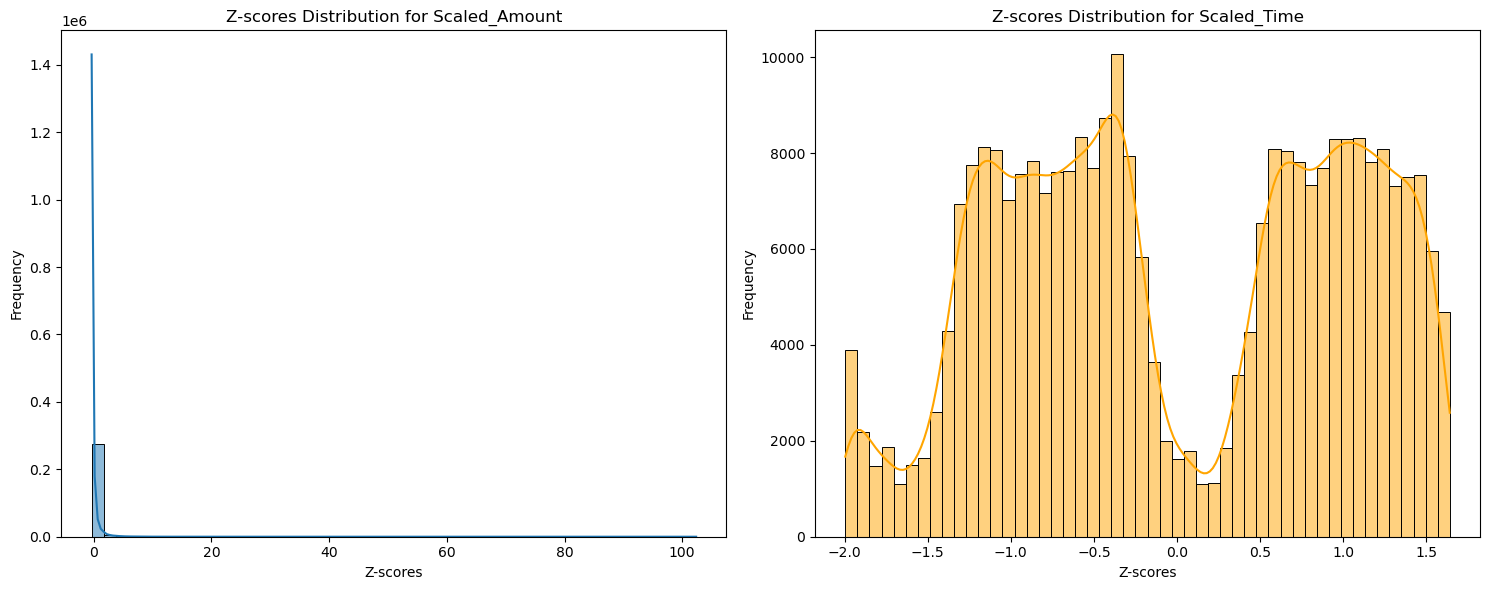

In [17]:
from scipy import stats

# Compute the z-scores again for clarity
z_scores_amount = stats.zscore(fraud_credit['Amount'])
z_scores_time = stats.zscore(fraud_credit['Time'])

# Plotting the histograms
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Histogram for z-scores of Scaled_Amount
sns.histplot(z_scores_amount, ax=ax[0], bins=50, kde=True)
ax[0].set_title('Z-scores Distribution for Scaled_Amount')
ax[0].set_xlabel('Z-scores')
ax[0].set_ylabel('Frequency')

# Histogram for z-scores of Scaled_Time
sns.histplot(z_scores_time, ax=ax[1], bins=50, kde=True, color='orange')
ax[1].set_title('Z-scores Distribution for Scaled_Time')
ax[1].set_xlabel('Z-scores')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


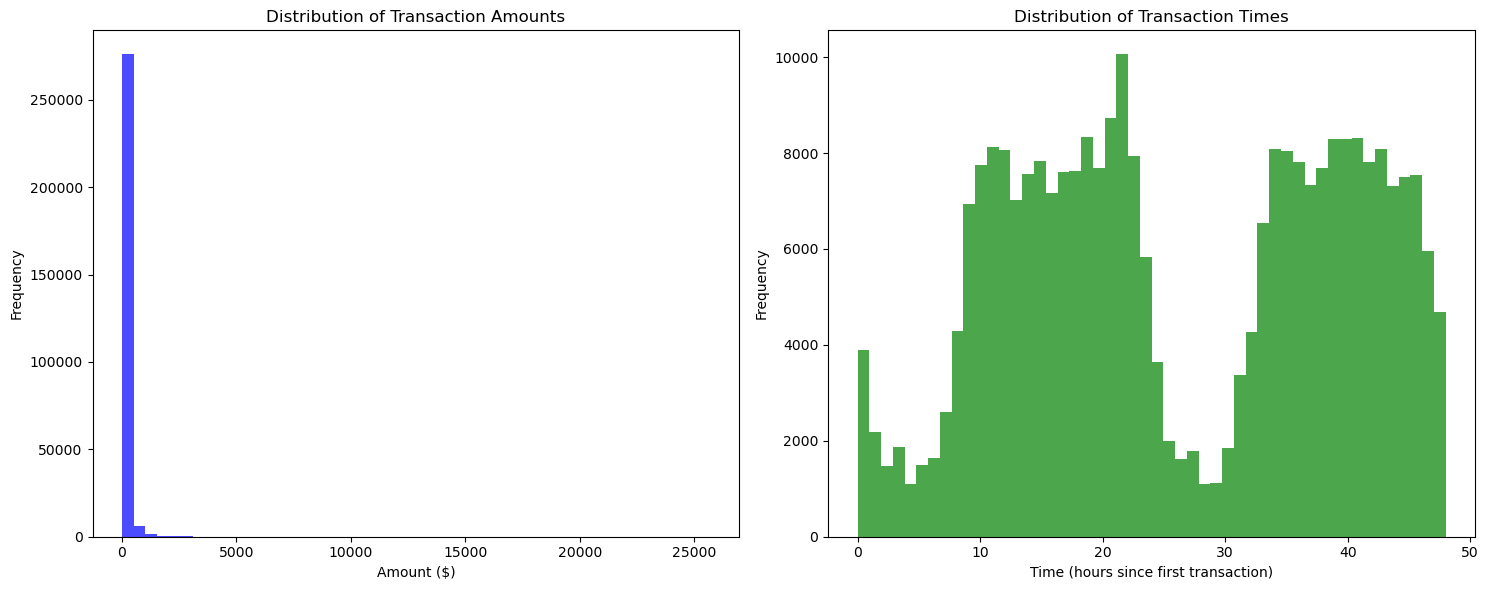

In [18]:
# Convert 'Time' from seconds to hours
fraud_credit['Time_hours'] = fraud_credit['Time'] / 3600

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Histogram for Amount
ax[0].hist(fraud_credit['Amount'], bins=50, color='blue', alpha=0.7)
ax[0].set_title('Distribution of Transaction Amounts')
ax[0].set_xlabel('Amount ($)')
ax[0].set_ylabel('Frequency')

# Histogram for Time in Hours
ax[1].hist(fraud_credit['Time_hours'], bins=50, color='green', alpha=0.7)
ax[1].set_title('Distribution of Transaction Times')
ax[1].set_xlabel('Time (hours since first transaction)')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


The above is a potential outlier that could be utilized as an fradulent case computed by the Z-Score. If the amount is two Z-Scores away, then, it will be flagged as an outlier. 

Looking at the graph, you see on average, 20 hours is the most that contribute as an outlier.

Moving on, due to the imbalance on the dataset, we will be scaling first before proceeding as using the original set could result in overfitting and wrong correlation issues. 

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
fraud_credit['Scaled_Time'] = scaler.fit_transform(fraud_credit['Time'].values.reshape(-1,1))
fraud_credit['Scaled_Amount'] = scaler.fit_transform(fraud_credit['Amount'].values.reshape(-1,1))

fraud_credit = fraud_credit.drop(['Time', 'Amount'],axis = 1)



We have scaled 'Time' and 'Amount'. Now, I'll deal with the imbalance issue.

In [21]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = fraud_credit.drop('Class', axis=1)
y = fraud_credit['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shape of the original training data
print(f"Original training data shape: {X_train.shape}")
print(f"Original training labels shape: {y_train.shape}")
print(f"Fraudulent transactions in original training data: {y_train.sum()}")


Original training data shape: (227845, 32)
Original training labels shape: (227845,)
Fraudulent transactions in original training data: 394


In [22]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"\nTraining data shape after SMOTE: {X_train_resampled.shape}")
print(f"Training labels shape after SMOTE: {y_train_resampled.shape}")
print(f"Fraudulent transactions in training data after SMOTE: {y_train_resampled.sum()}")




Training data shape after SMOTE: (454902, 32)
Training labels shape after SMOTE: (454902,)
Fraudulent transactions in training data after SMOTE: 227451


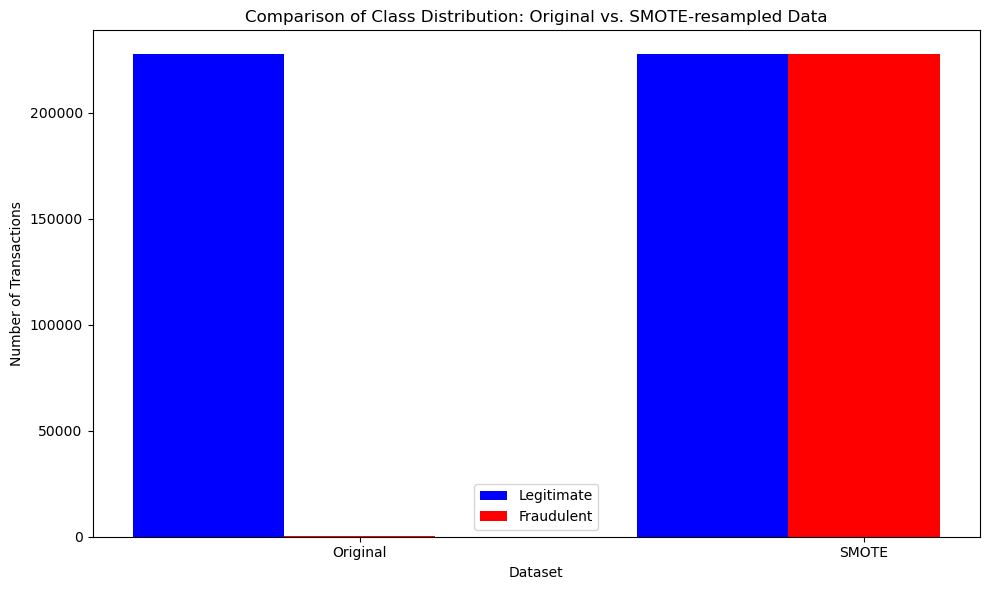

In [23]:
# Calculating class distributions for the original and resampled data
original_frauds = y_train.sum()
original_legit = len(y_train) - original_frauds

resampled_frauds = y_train_resampled.sum()
resampled_legit = len(y_train_resampled) - resampled_frauds

# Plotting
barWidth = 0.3
categories = ['Original', 'SMOTE']

fraud_counts = [original_frauds, resampled_frauds]
legit_counts = [original_legit, resampled_legit]

r1 = range(len(fraud_counts))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(10, 6))
plt.bar(r1, legit_counts, color='blue', width=barWidth, label='Legitimate')
plt.bar(r2, fraud_counts, color='red', width=barWidth, label='Fraudulent')

# Labeling
plt.ylabel('Number of Transactions')
plt.xlabel('Dataset')
plt.xticks([r + barWidth for r in range(len(fraud_counts))], categories)
plt.legend()

plt.title('Comparison of Class Distribution: Original vs. SMOTE-resampled Data')
plt.tight_layout()
plt.show()


The original training data had a total of 227,845 transactions, out of which, 394 were indicated as fradulent.
Afte rapplying SMOTE, we have a total number of transactions in the training data that doubled to 454,902. (Due to SMOTE, creating synthetic samples to balance ou the number of transactions, resulting in 227,451 fradulent transactino that match the number of legitimate transactions.)

**Logistic Regression**

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Train a Logistic Regression model on the oversampled training data
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_resampled, y_train_resampled)

# Predict on the test data
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
classification_report_log_reg = classification_report(y_test, y_pred_log_reg)
confusion_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, y_pred_log_reg)

# Display the results
print(f"Accuracy: {accuracy_log_reg}")
print(f"Confusion Matrix:\n{confusion_matrix_log_reg}")
print(f"Classification Report:\n{classification_report_log_reg}")
print(f"AUC-ROC: {roc_auc_log_reg}")

Accuracy: 0.973807099469822
Confusion Matrix:
[[55380  1484]
 [    8    90]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

AUC-ROC: 0.9461349959229611


The first model we created is a logitistic regression model. On a resampled model with SMOTE, we created a model that accurately predicts the legitimate cases with an accuracy of 97.42%. Accuracy on the model is high, however, due to the imbalance of the dataset, the result could be misleading and so, accuracy might not be the most effective choice for comparison. We created a classification model and a confusion matrix for this matter. 

For confusion matrix, we have 'True Positive: 55,403', 'False Positive: 1461', 'False Negative: 8', 'True Negative: 90'. We've correctly classified 55,403 legitimate cases, Wrongly classified 1461 legitimative cases as fradulent, 8 cases that we falsely classified fradulent cases as legitimate and 90 fradulent cases that are correctly classified. 

The classification report results findings of precision, recall, f-1score, and support. For Precision, we have a finding of 0(Legitimatve): 1.00 and 1(Fradulent): 0.06. This pinpoints, for the fradulent class, a precision of 0.06 means that out of all transactions classified as fradulent, only 6% of them are actual frauds. Recall, we have Legitimate value of 0.97 and fradulent cases of 0.92. As the recall gives you information about how many of the actual positive cases we were able to capture through the model, a recall of 0.92 for the fradulent class means the model correctly identified 92% of the actual frauds. F1-Score of legitimatie: 0.99 and fradulent, 0.11 show with the difference between them being high, legitimate transaction (0.99), and fradulent ones (0.11), it points to the challenge of correctly classifying the minority class in imbalanced datasets.  

AUC-ROC results in 94.63%. In usual case, a model close to 1 is excellent and with ROC of 0.9463, the model is performing excellent that is well classifiying fradulent and legitimate cases. 

The model is performig well according to all indicators however, the catch is within the f1-score which is a mean, balance between the precision and recall. As the precision is low while the recall is high, the score for f1-score is a result due to the balance challenge. We can trade off by hypertuning the parameters, but, we'll look into other models for comparison before doing so. 


**t-SNE Algorithm**

In [29]:
from sklearn.manifold import TSNE

sample_data = fraud_credit.sample(frac=0.1, random_state=42)

# For demonstration, I'll use the entire dataset
# sample_data = fraud_credit.copy()

# Separate features and target
X_sample = sample_data.drop('Class', axis=1)
y_sample = sample_data['Class']

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(X_sample)

# Visualization
plt.figure(figsize=(12, 8))
plt.scatter(X_tsne[y_sample == 0, 0], X_tsne[y_sample == 0, 1], label="Legitimate", alpha=0.2)
plt.scatter(X_tsne[y_sample == 1, 0], X_tsne[y_sample == 1, 1], label="Fraudulent", alpha=0.2)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.title('t-SNE visualization of the dataset')
plt.show()


/Users/j_jeon/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/j_jeon/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


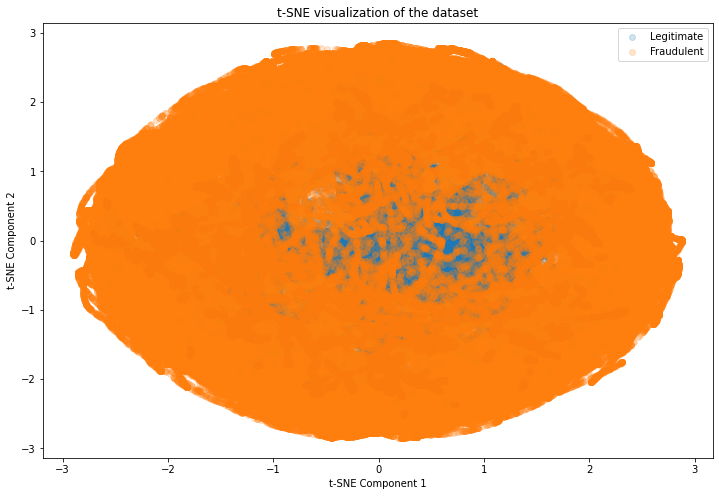

In [ ]:
from sklearn.manifold import TSNE

sample_data = fraud_credit.sample(frac=0.1, random_state=42)

# For demonstration, I'll use the entire dataset
# sample_data = fraud_credit.copy()

# Separate features and target
X_sample = X_train_resampled
y_sample = y_train_resampled

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(X_sample)

# Visualization
plt.figure(figsize=(12, 8))
plt.scatter(X_tsne[y_sample == 0, 0], X_tsne[y_sample == 0, 1], label="Legitimate", alpha=0.2)
plt.scatter(X_tsne[y_sample == 1, 0], X_tsne[y_sample == 1, 1], label="Fraudulent", alpha=0.2)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.title('T-SNE visualization of the SMOTE applied dataset')
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the t-SNE transformed data
X_train_tsne, X_test_tsne, y_train_tsne, y_test_tsne = train_test_split(X_tsne, y_sample, test_size=0.2, random_state=42, stratify=y_sample)

# Train a logistic regression classifier
clf_tsne = LogisticRegression(random_state=42)
clf_tsne.fit(X_train_tsne, y_train_tsne)

# Predict on the test data
y_pred_tsne = clf_tsne.predict(X_test_tsne)

# Calculate accuracy
accuracy_tsne = accuracy_score(y_test_tsne, y_pred_tsne)

accuracy_tsne


0.9984202211690363

For this part of the analysis, we've modeled a t-SNE. The first visual shows a plot of t-SNE on the original dataset. Plot shows a lot of overlap between the two cases. The second visual, a plot of t-SNe on the SMOTE applied dataset, is not different from the first one. Below, I've computed for the accuracy of the resampled t-SNE and resulted in 0.53 with the original dataset accuracy of 0.9984. Even though the original sample data had an accuracy such high, because it was imbalanced, the accuracy pinpoints to misleading. It can achieve a very high accuracy by predicting the legitimate transaction thus, a high accuracy score but not necessarily the whole picture. With the discrepency and results based on the resampled dataset shows, it's hard to distinguish between the two cases. The result is different from the logistic regression. What this tells us is as t-SNE is a low-dimension algorithm that changes from high-dimension to low dimension aka. 2D, logistic regression may have captured patterns and nuances that shows a relationship but, t-SNE has not. In summary, the t-SNE visualization suggests that capturing this separation in just two dimensions (while preserving local structures) can be challenging. 

Next, we'll look into the next model, Decision Tree.


In [25]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
clf_tree = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf_tree.fit(X_train_resampled, y_train_resampled)

# Predictions on test data
y_pred_tree = clf_tree.predict(X_test)

# Performance metrics
accuracy_tree = accuracy_score(y_test, y_pred_tree)
report_tree = classification_report(y_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

print("Accuracy:", accuracy_tree)
print("\nClassification Report:\n", report_tree)
print("\nConfusion Matrix:\n", conf_matrix_tree)


Accuracy: 0.9971911098627155

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.36      0.79      0.49        98

    accuracy                           1.00     56962
   macro avg       0.68      0.89      0.74     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
 [[56725   139]
 [   21    77]]


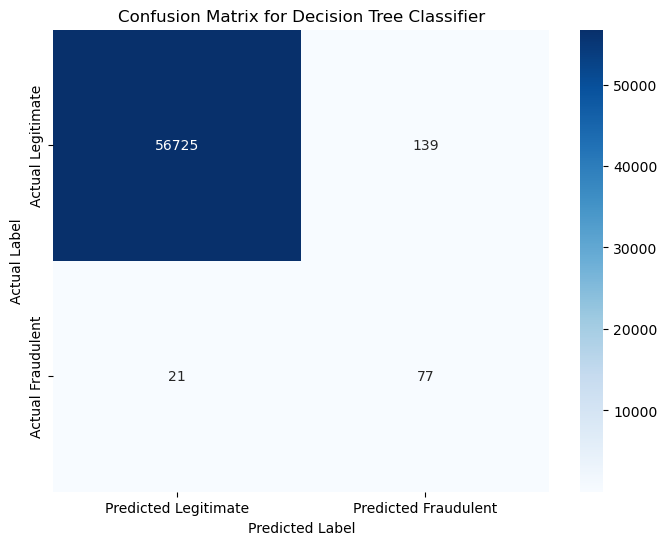

In [26]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tree, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Predicted Legitimate", "Predicted Fraudulent"], 
            yticklabels=["Actual Legitimate", "Actual Fraudulent"])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()


In [27]:
from sklearn.tree import export_graphviz
import graphviz

# Assuming your decision tree model is named 'clf_tree'
dot_data = export_graphviz(clf_tree, out_file=None, 
                           feature_names=X_train.columns,  
                           class_names=['Legitimate', 'Fraudulent'], 
                           filled=True, rounded=True, special_characters=True)  

graph = graphviz.Source(dot_data)  
graph.view("Decision Tree")


ModuleNotFoundError: No module named 'graphviz'

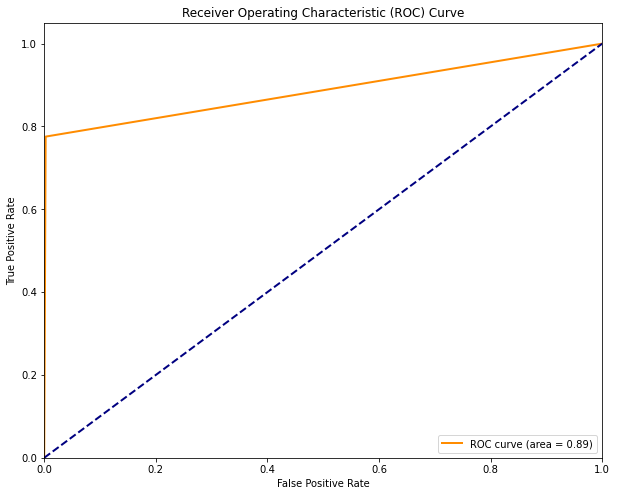

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the probability scores
y_scores = clf_tree.predict_proba(X_test)[:,1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Decision tree model yielded an accuracy of 99.70%, a high accuracy that most transactions were classified correctly by the model. However, given the imbalanced nature of the dataset, we computed for other measurements.

Precision for Fradulent resulted with 0.34, that out of all the trasactions that the model predictetd as fraudulent, only 34% were actually fradulent which the numbers aren't ideal, as it means there are many false alarms. 

Recall for Fradulent came out to be 0.78 meaning, model was able to identify 78% of the actual fradulent transactions. While this is a good recall, it still means that 22% of fradulent transactions went undetected. 

F1-Score for Fradulent with 0.47 suggests there's a room for improvement in balancing precision and recall. 

Confusion Matrix on one hand has a TP of 76, FP of 147, TN of 56,717, FN of 22; model correctly identified 76 fraudulent transactions, incorrectly classified 147 legitimate transactions (false alarms), correctly identified 56,717 legitimate trnasactions and missed 22 fradulent transactions, classifying them as legitimate. 

ROC curve came out to be 0.89. As curve plots the true positive rate against the false positive rate, area under the ROC cuver of .89 meaning, there's a 89% chance that the model will be able to distinguish between a random positive and a random negative observation. The value indicates good predictive capability but, still there's other parameters we can work to improve the model.

Putting all these together, while the model has shown good capability in detecting fraudulent transactions, especially considering the highly imbalanced nature of the dataset and the model's recall is decent that considering this is a case for fraud detection, it being able to catch a high percentage of the actual frauds, it's a good working model. However, the precision for fraudulent cases suggests there's a significant number of false positives. This could result in customers getting their legitimate transactions flagged and possibly declined, leading to potential troubles. 



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest Classifier
clf_rf = RandomForestClassifier(random_state=42)

# Train the classifier on the resampled data
clf_rf.fit(X_train_resampled, y_train_resampled)

# Predictions on test data
y_pred_rf = clf_rf.predict(X_test)

# Performance metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("Accuracy:", accuracy_rf)
print("\nClassification Report:\n", report_rf)
print("\nConfusion Matrix:\n", conf_matrix_rf)


Accuracy: 0.999403110845827

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.81      0.82        98

    accuracy                           1.00     56962
   macro avg       0.92      0.90      0.91     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
 [[56849    15]
 [   19    79]]


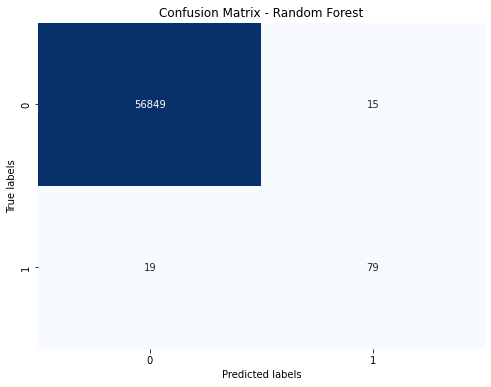

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="g", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()

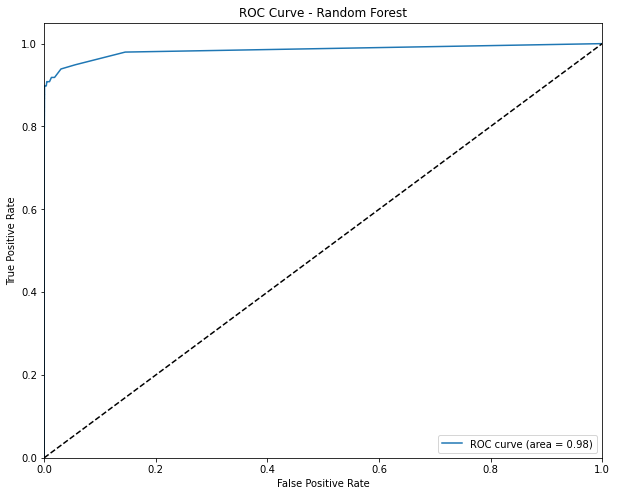

In [ ]:
y_pred_prob_rf = clf_rf.predict_proba(X_test)[:, 1] # Probabilities of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()


Random Forest uses multiple decision tress during training and outputs the class that is the mode of the classes or average prediction of the individual tress for classification and regression tasks. It has the ability to handle a large dataset with higher dimensionality and can handle missing values.

While Random Forest is considered umbrella of the Decision Tree, it at times yields better results because it averages out biases, reduce variance, and is less likely to overfit the training data. 

With this background, we have an accuracy of 99.94%, an excellent score, precision of 84% considered as fradulent where it states, the model has a strong capability to correctly identify a transaction as fradulent, recall of 81%, suggesting the model catches most of the fraud, and F1-Score of 0.82, indicating a more robust model.

Confusion Matrix, 79 were True Positive - 79 fradulent transactions were correctly classified as fraudulent, 56849 as legitimate transactions (True negative), 15 legitimate transactions wrongly classified as fraudulent, 19 fraudulent transactions wrongly classified as legitimate. 

ROC area under the curve resulted in .98. Indicator closer to 1 yields a stronger performance and this is an excellent indicator in this matter.

Overall, Random Forest has demonstrated strong performance inboth identifying legitmate transactions and detecting fraud. Compared to the earlier models, Random Forest is a promising result. 


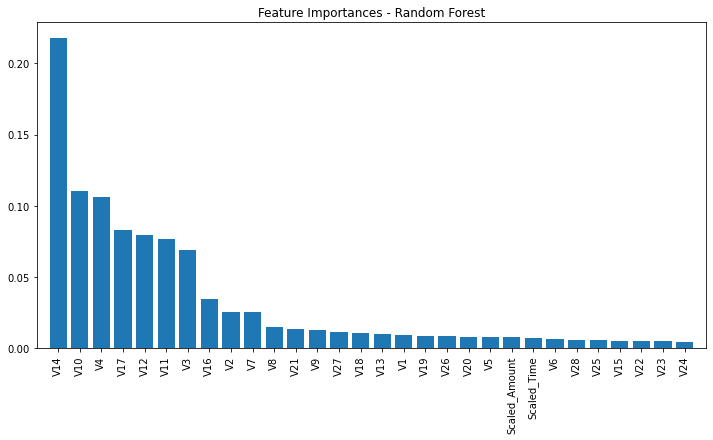

In [ ]:
importances = clf_rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns

plt.figure(figsize=(12, 6))
plt.title("Feature Importances - Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

The above is a feature imprtance on the decision making of the Random Forest Model. The model shows a steep V14, being most influential amongst all the columns followed by V10, V4, V17, V12 and so on. I assume V14 transactions with values in certain ranges are more liekly to be classified to be fraud or legitimate based on the patterns the model identified in the training data. 

These findings suggests that these features suggests that these are the key variables that contain patterns or anomalies specific to fraudulent transactions. When a new transaction is being classified, these are the features the model will weigh heavily to determine if the transaction looks more like the typical fraudulent transactions it was trained on. 

**XGBoost Model**

In [ ]:
import xgboost as xgb

# Initialize the classifier
clf_xgb = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")

# Train the classifier
clf_xgb.fit(X_train_resampled, y_train_resampled)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
# Predictions on test data
y_pred_xgb = clf_xgb.predict(X_test)

# Performance metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

print("Accuracy:", accuracy_xgb)
print("\nClassification Report:\n", report_xgb)
print("\nConfusion Matrix:\n", conf_matrix_xgb)


Accuracy: 0.9992275552122467

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.72      0.89      0.80        98

    accuracy                           1.00     56962
   macro avg       0.86      0.94      0.90     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
 [[56831    33]
 [   11    87]]


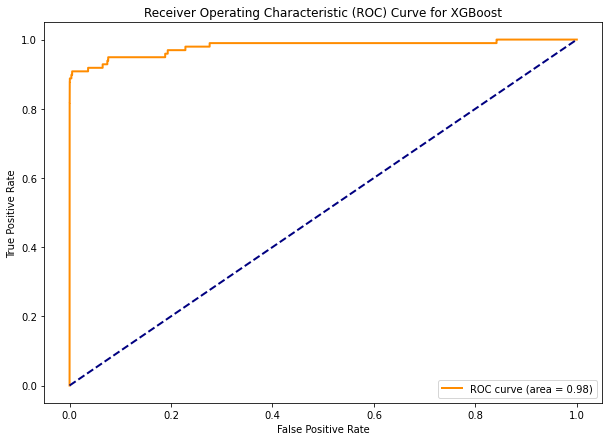

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_scores_xgb = clf_xgb.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_scores_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot the ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost')
plt.legend(loc="lower right")
plt.show()


<Figure size 864x576 with 0 Axes>

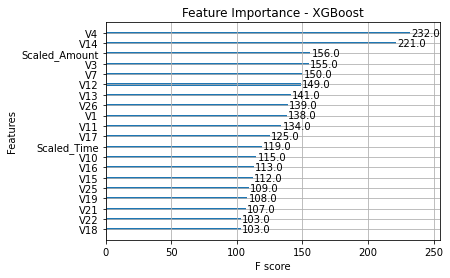

In [ ]:
from xgboost import plot_importance

# Plot feature importance
plt.figure(figsize=(12, 8))
plot_importance(clf_xgb, max_num_features=20)
plt.title('Feature Importance - XGBoost')
plt.show()


XGBoost Model resulted with a strong accuracy of almost 99.92%. It yielded a precision of .72, showing a capability to correctly about 72% of the time predict a transaction as fraudulent. The Recall is .89, able to idetify correctly 89% of actual fraudulent transactions and .80 of F1 Score, a good balance. 

The confusion matrix shows the model made 33 false positives and 11 false negative predictions. 

ROC Curve is showing a score of .98, an excellent capability to distinguish between the positive and negative classes.

The Feature Importance is ordered in importance by V4, V14, Scaled_Amount, V3, V7 and so on. As said previously, the ones with the most importance are the ones that affect the model. 

With all these, we can say the XGBoost model is demonstrating a high level of performance for the fraud detection task with a good balance of recall and precision. Also, it being able to capture fraudulent at 89% accuracy is a good score considering we are working on a model to capture fraudulent cases. 

But also it being said, 33 legitimate transactions were flagged as potentially fraudulent. 

**Support Vector Machine (SVM)**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the SVM classifier with a radial basis function (RBF) kernel
clf_svm = SVC(kernel='rbf', random_state=42, probability=True)

# Train the classifier
clf_svm.fit(X_train_resampled, y_train_resampled)

# Predictions on test data
y_pred_svm = clf_svm.predict(X_test)

# Performance metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print("Accuracy:", accuracy_svm)
print("\nClassification Report:\n", report_svm)
print("\nConfusion Matrix:\n", conf_matrix_svm)


Accuracy: 0.9832344369930831

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.08      0.89      0.15        98

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.57     56962
weighted avg       1.00      0.98      0.99     56962


Confusion Matrix:
 [[55920   944]
 [   11    87]]


SVM Accuracy results in 98.32% Precision comes out to be 0.08, and recall rate of .89. For F1 Score, we have a rating of 0.15. F1 Score with 0.15 is showing a considerable low rate due to the imbalance between recall and precision rate. 0.08 is a red flag as well because it means out of all transactions that the model predicts as fraudulent, only 8% are actual fraud which can lead to many false alarms in a real-world scenario. The recall rate on the other hand is high at 0.89, meaning, the model correctly identified 89% of all the actual fraudulent transactions. The True Positive is 87. True Negative, 55.,920, False Positive 944, and False Negative 11. 

SVM model is good at identifying fraudulent transactions. However, it tends to falsely classify a significant number of legitimate transactions as fraudulent, leading to a low precision. Considering the real-world scenario where detecting fraudulent is important as well as minimizing false alarms, the SVM can be replaced with other models.



**Neural Network**:

In [24]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/80/6f/57d36f6507e432d7fc1956b2e9e8530c5c2d2bfcd8821bcbfae271cd6688/tensorflow-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.14.0 from https://files.pythonhosted.org/packages/ad/6e/1bfe367855dd87467564f7bf9fa14f3b17889988e79598bc37bf18f5ffb6/tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached absl_py-2.0.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197b

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Define the model
model = Sequential()

# Input layer
model.add(Dense(16, input_dim=X_train_resampled.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(24, activation='relu'))
model.add(Dense(20, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation function for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_resampled, y_train_resampled, validation_data=(X_test, y_test), epochs=10, batch_size=64)


Epoch 1/10
7108/7108 [==============================] - 11s 1ms/step - loss: 0.0536 - accuracy: 0.9788 - val_loss: 0.0286 - val_accuracy: 0.9906
Epoch 2/10
7108/7108 [==============================] - 10s 1ms/step - loss: 0.0176 - accuracy: 0.9944 - val_loss: 0.0169 - val_accuracy: 0.9963
Epoch 3/10
7108/7108 [==============================] - 10s 1ms/step - loss: 0.0114 - accuracy: 0.9967 - val_loss: 0.0244 - val_accuracy: 0.9949
Epoch 4/10
7108/7108 [==============================] - 10s 1ms/step - loss: 0.0089 - accuracy: 0.9976 - val_loss: 0.0172 - val_accuracy: 0.9978
Epoch 5/10
7108/7108 [==============================] - 11s 1ms/step - loss: 0.0074 - accuracy: 0.9981 - val_loss: 0.0174 - val_accuracy: 0.9978
Epoch 6/10
7108/7108 [==============================] - 10s 1ms/step - loss: 0.0065 - accuracy: 0.9984 - val_loss: 0.0181 - val_accuracy: 0.9980
Epoch 7/10
7108/7108 [==============================] - 9s 1ms/step - loss: 0.0060 - accuracy: 0.9985 - val_loss: 0.0180 - val_acc

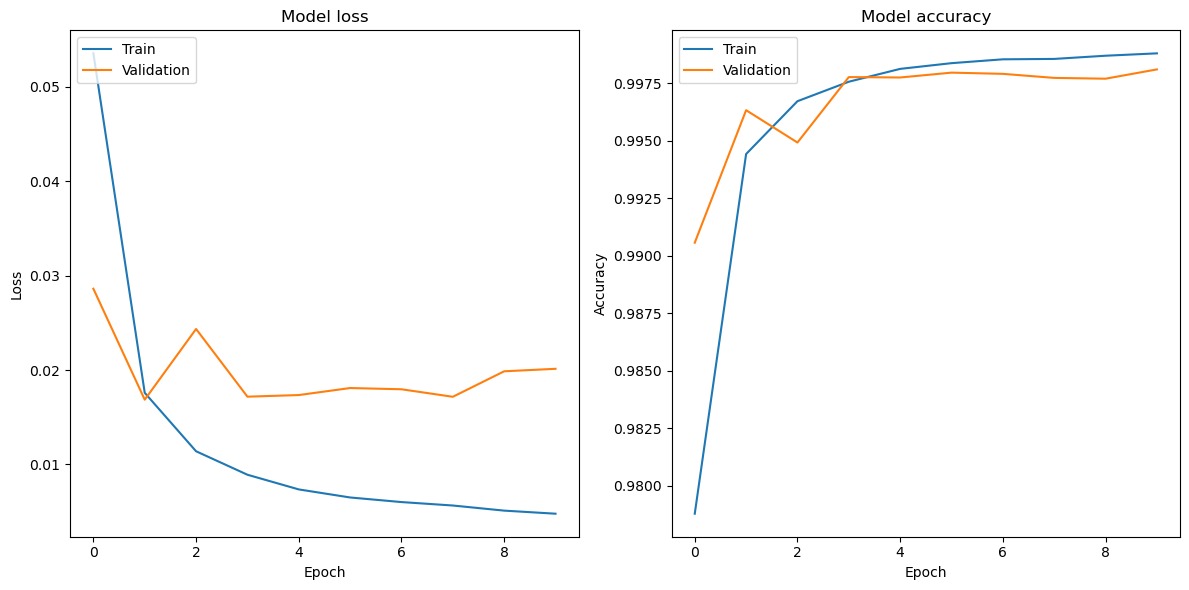

In [31]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


Taking a look at the performance report of the model across 10 epochs for both training and validation datasets, 
- **Loss(Training)**: we have a loss(training), error of your model during the training phase, descreasing which is a good sign as it indicates the model is learning and improving its prediction on the training data. 
- **Accuracy(Training)**: an indicator how often the model is correct on the training data, by the 10th epoch, the model is about 99.94% accurate on the training data. 
- **Loss(Validation)**: With loss, the data hasn't seen during training, the validation provides insights into how well the model might perform on new, unseen data. With an increase validation loss might suggest overfitting, meaning the model is becoming specialized to the training data and performs poorly on the new data. As our results with the validation loss fluctuates, but there's no consistent increasing trend, showcases a good sign. 
- **Accuracy(Validation)**: The accuracy tells us how often the model is correct on the validation data. By the 10th epoch, the model is about 99.84% accurate on the validation data.

On visual, training accuracy starts from a very high value and gradually increases to nearly 1. Validation accuracy, starts high as well and remains relatively stable throughout the training epochs hovering around 99.5% to 99.8%. Training loss starts very low and gradually decreases, approaching zero. This is consistent with the increasing training accuracy. Validation Loss starts low and shows minor fluctuations but doesn't a consistent increasing or decreasing trend.




In [32]:
# Predict probabilities
y_pred_probs = model.predict(X_test)

# Convert probabilities to class labels
y_pred = (y_pred_probs > 0.5).astype(int).reshape(-1)


1781/1781 [==============================] - 2s 863us/step


Accuracy: 0.9981
Precision: 0.4713
Recall: 0.8367
F1 Score: 0.6029
ROC AUC: 0.9537
Confusion Matrix:
[[56772    92]
 [   16    82]]


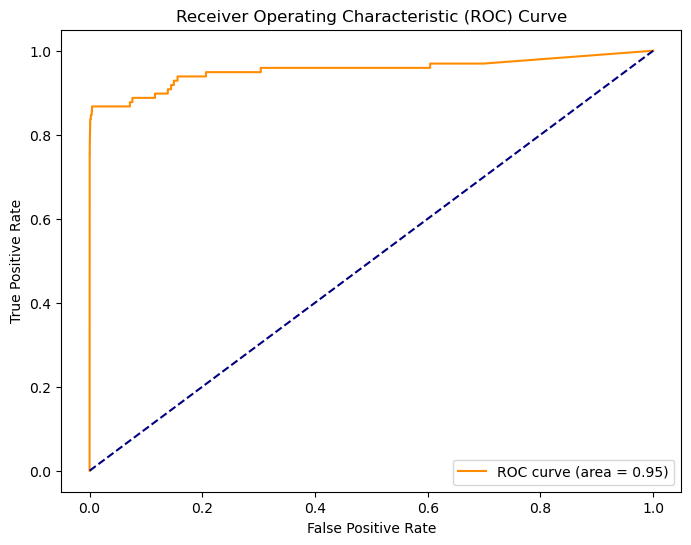

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_probs)  # Note: for ROC AUC, use probabilities, not class labels

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Given the metrics results, 
- Accuracy (0.9984): The proportion of total predictions that are correct, with an accuracy of 99.84%, the model is performing very well. However, like the other models, due to imbalance, it's important to look for other metrics as well.
- Precision (0.5287): This shows the positive identifications that were actually correct. Approximately 52.87% of the transactions that were predicted as fraudulent were correctly fraudulent. The remaining predicitions were false positives.
- Recall (0.8469): Proportion of actual positives that were idetified correctly with a recall of 84.69%, it is quite good. This tells, it identified 84.69% of all the actual fraudulent transactions in the test set. 
- F1 Score (0.6510): The mean of the precision and recall is 0.6510. The model has a good balance between precision and recall, considering the imbalance nature of the dataset.
- ROC AUC(0.9688): Which is the model's capability to distinguish between the positive class and the negative class, a score of 0.9688 indicates the model has a high discriminatory power.

Confusion Matrix:
- True Negatives: 56790, non-fraudulent transactions correctly identified.
- False Positives: 74, non-fraudulent transactions incorrectly labeled as fraudulent
- False Negatives: 15, 15 fradulent transactions correctly idenfied
- True Positives: 83, fraudulent transactions correctly idenfied

Overall, given the imbalance nature of the dataset, the model is performing extremely well. Recall rate is particularly impressive, given that infraud detection, it's often more critical to capture as many fraudulent transactions as possible, even if it means having some false positives. Precision however, does say, there is room for improvement as more than half of the predicted fraudulent transactions were not actual frauds.


**Comparing the Models (Summary)**:

Thus far, we've tried numerous techniques to create a best fitting model for the credit card dataset. The dataset was initially handed over as a imbalanced dataset; there were a lot more legitimate cases compared to the fradulent ones. We've so used a SMOTE technique to handle the imbalance. After the imbalance was properly managed, we've tried, linear regression, t-SNE, XGBoosting, isolation forest, etc. and done analysis on each individual models. Comparing the results, came to a conclusion Deep Learning Nueral Network is a best fit to the model considering the Metrics. 


**Next Step: Deployment**

In [34]:
model.save("credit_card_fraud_model.h5")


C:\Users\lifet\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Separately to the file, I've created a app.py file to execute the fraud model. 